<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/Evaluation_and_Diagnostic_of_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Model Evaluation :**


* Model evaluation is the broader process of assessing the overall performance of a model on a given task or set of tasks.
*  It involves using standard metrics to quantify the model's performance, such as accuracy, precision, recall, F1 score, or area under the receiver operating characteristic curve (AUC-ROC).
* Evaluation is often performed using a test set or validation set that was not seen by the model during training. Standard evaluation metrics provide a high-level overview of how well the model is performing on average.


##**Linear and Polynomial Regression and evlauation using scikit learn**


###**Standardization :**

* This is a common preprocessing step in machine learning pipelines, especially when working with algorithms that are sensitive to the scale of the input features, such as support vector machines or k-nearest neighbors and Linear Regession

* it's removing value of maen by setting it to 0 and set std = 1

###**Adding polynomial features :**
* creating new features by raising the existing features to higher powers. This process allows linear regression models to capture more complex relationships between the input features and the target variable.
it's removing value of maen by setting it to 0 and set std = 1

* on adding polynomial, fitting and transforming the training data ensures that the model learns the appropriate transformation parameters, while only transforming the validation or test data helps evaluate the model's performance on new, unseen samples without introducing data leakage

###**Choosing the best model :**



*   you want to choose one that performs well both on the training and cross validation set. It implies that it is able to learn the patterns from your training set without overfitting
* actaully test set value of mse is the one that represent the model,you have to do same transformation on test set as training set



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


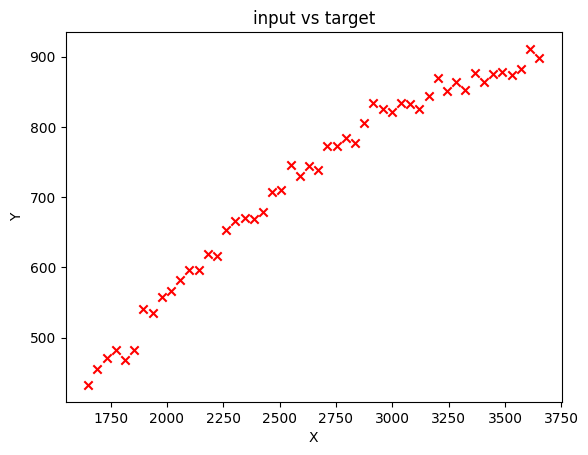

shape of training set input is (30, 1)
shape of training set (target) is (30, 1)

shape of cross validation input is (10, 1)
shape of cross validation (target) is (10, 1)
shape of test set (input) is : (10, 1)
shape on test set (target) is (10, 1)


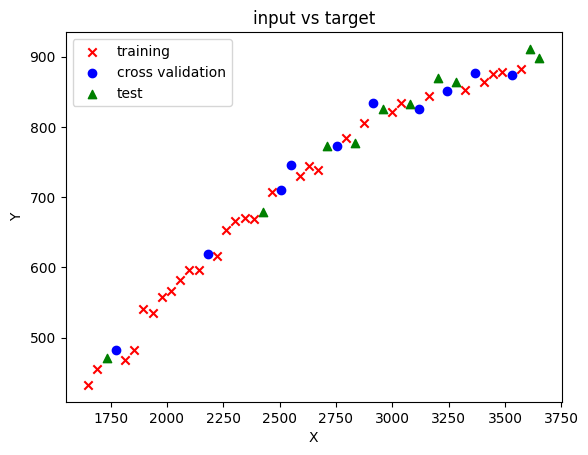


Training Data after scaling


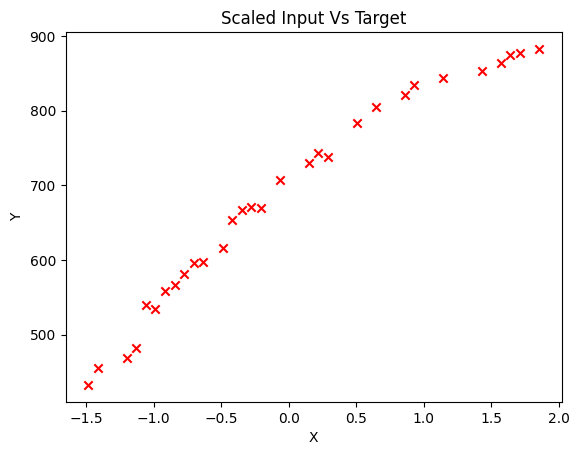

training MSE (use sklearn function):406.19374192533155
Cross Validation MSE: 551.7789026952216

Model preformance on training data 


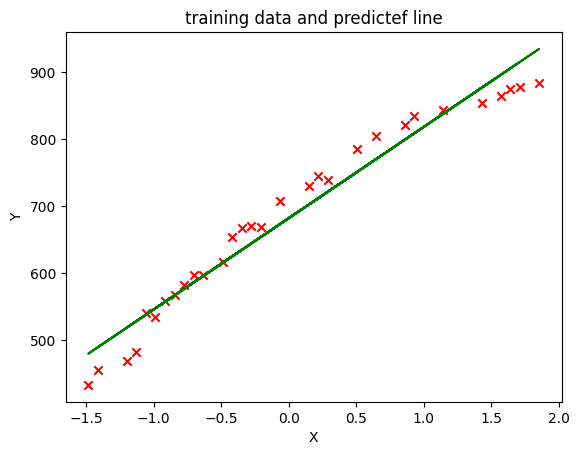

In [23]:
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/data_w3_ex1.csv",delimiter=',')

x =data[:,0] #on shape (50,)
y =data[:,1] #on shape (50,)

x =np.expand_dims(x,axis =1) # to make it 2D with shape (50,1)
y =np.expand_dims(y,axis=1)  # to make it 2D with shape (50,1)

#plot this data
plt.scatter(x,y,marker='x',c='r')
plt.title("input vs target")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#split data into training data and test data
x_train,x_,y_train,y_ =train_test_split(x,y,test_size=0.40,random_state=1)
x_cv,x_test,y_cv,y_test =train_test_split(x_,y_,test_size=0.50,random_state=1)
del x_,y_

print(f"shape of training set input is {x_train.shape}")
print(f"shape of training set (target) is {y_train.shape}\n")
print(f"shape of cross validation input is {x_cv.shape}")
print(f"shape of cross validation (target) is {y_cv.shape}")
print(f"shape of test set (input) is : {x_test.shape}")
print(f"shape on test set (target) is {y_test.shape}")

#plot data after splitting
plt.scatter(x_train,y_train,marker='x',c='r',label='training')
plt.scatter(x_cv,y_cv,marker='o',c='b',label='cross validation')
plt.scatter(x_test,y_test,marker='^',c='g',label='test')
plt.title("input vs target")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

scaler_linear =StandardScaler()
x_train_scaled =scaler_linear.fit_transform(x_train)
#check it by plotting data
print("\nTraining Data after scaling")
plt.scatter(x_train_scaled,y_train,marker='x',c ='r')
plt.title("Scaled Input Vs Target")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#linear model
linear_model =LinearRegression()
linear_model.fit(x_train_scaled,y_train)

#evaluate model use MSE built in function
yhat =linear_model.predict(x_train_scaled) # we will use this on measurin error
# we used only 2 not 2*m becaus mean means it's divided laready by number of examples(m) and this 2 is just for drevative
print(f"training MSE (use sklearn function):{mean_squared_error(y_train,yhat)/2}")

#'s important to apply the same scaling transformation to your validation set and test set.
#This ensures that your data remains on a consistent scale across all sets, and the model is trained and evaluated on comparable input.
x_cv_scaled=scaler_linear.transform(x_cv)
yhat_cv =linear_model.predict(x_cv_scaled)
print(f"Cross Validation MSE: {mean_squared_error(y_cv,yhat_cv)/2}")

#check model preformance by plotting data
print("\nModel preformance on training data ")
plt.scatter(x_train_scaled,y_train,marker='x',c ='r')
plt.plot(x_train_scaled,yhat,c='g')
plt.title("training data and predictef line")

plt.xlabel("X")
plt.ylabel("Y")
plt.show()



[[ 1.42715997  1.47236856]
 [-0.27691164 -0.36461881]
 [ 1.71117191  1.84025141]
 [ 0.22010925  0.1055935 ]
 [ 0.14910627  0.03511397]]
shape of scalled original data :(30, 1)
shape of mapped scaled data :(30, 2)
Training mapped MSE :49.111609334025154
Cross validation mapped MSE : 87.6984121111191


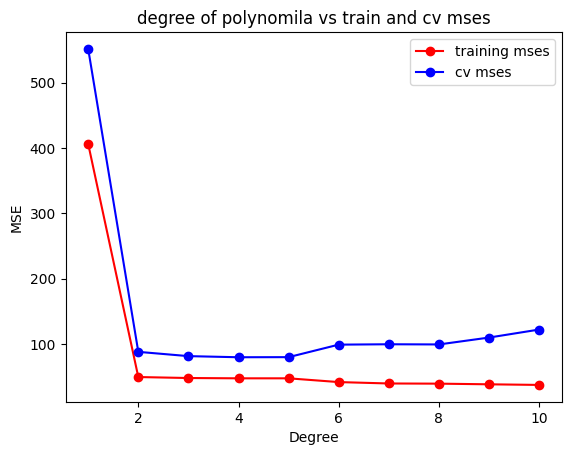

Lowest CV MSE is found =4 
values of mse of training dataset on degree 4 is : 47.146466442636395
 cross validation error when degree is 4 : 79.43134912070502
 test set mse when degree is 4 = 104.6316820528975


In [37]:
# adding polynomial features
poly =PolynomialFeatures(degree =2,include_bias =False)
x_train_mapped =poly.fit_transform(x_train) # add polynomial feaures to original data then apply features scaling
scaler_poly =StandardScaler()
x_train_mapped_scaled =scaler_poly.fit_transform(x_train_mapped)
print(x_train_mapped_scaled[:5]) # first five elements of mapped data
print(f"shape of scalled original data :{x_train_scaled.shape}")
print(f"shape of mapped scaled data :{x_train_mapped_scaled.shape}") # it's two degree what it meas 2 features

#let's build model
model =LinearRegression()
model.fit(x_train_mapped_scaled,y_train)
yhat =model.predict(x_train_mapped_scaled)
print(f"Training mapped MSE :{mean_squared_error(y_train,yhat)/2}")

#  do the same for validation data
x_cv_mapped =poly.transform(x_cv)
x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped) #apply same process on cross validation data, notice it's only transform not fit_transform
yhat_cv =model.predict(x_cv_mapped_scaled)
print(f"Cross validation mapped MSE : {mean_squared_error(y_cv,yhat_cv)/2}")

# to know which polynomial degree is better, try many values and save value of mse for training data and cross validation
train_mses =[] # to save mse train value
cv_mses =[]
models =[]
scalers =[]

for degree in range(1,11):
  #add polynomial featrues and scale the training set
  poly =PolynomialFeatures(degree,include_bias=False)
  x_train_mapped =poly.fit_transform(x_train)
  scaler_poly =StandardScaler()
  x_train_mapped_scaled =scaler_poly.fit_transform(x_train_mapped)
  scalers.append(scaler_poly)
  #create and train model
  model =LinearRegression()
  model.fit(x_train_mapped_scaled,y_train)
  models.append(model)
  #compute training set MSE
  yhat =model.predict(x_train_mapped_scaled)
  train_mse =mean_squared_error(y_train,yhat)/2
  train_mses.append(train_mse)
  # add polynomial featrues and scale to cross validation set
  poly =PolynomialFeatures(degree,include_bias =False)
  x_cv_mapped =poly.fit_transform(x_cv)
  x_cv_mapped_scaled =scaler_poly.transform(x_cv_mapped)
  # compute cross validation mse directly using same model
  yhat = model.predict(x_cv_mapped_scaled)
  cv_mse =mean_squared_error(y_cv,yhat)/2
  cv_mses.append(cv_mse)

degree =range(1,11) # to use it on x-axis
plt.plot(degree,train_mses,marker='o',c ='r',label ='training mses')
plt.plot(degree,cv_mses,marker='o',c='b',label ='cv mses')
plt.title("degree of polynomila vs train and cv mses")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.show()


# you can choose lowest degree
degree = np.argmin(cv_mses)+1 # count of list starts from zeros
print(f"Lowest CV MSE is found ={degree} ") # it seems 4th degree

poly =PolynomialFeatures(4,include_bias =False)
x_train_mapped =poly.fit_transform(x_train)
scaler =StandardScaler()
x_train_mapped_scaled =scaler.fit_transform(x_train_mapped)
model =LinearRegression()
model.fit(x_train_mapped_scaled,y_train)
yhat_1 =model.predict(x_train_mapped_scaled)
train_mse =mean_squared_error(y_train,yhat_1)/2
print(f"values of mse of training dataset on degree 4 is : {train_mse}")

#do same on cross validation dataset
x_cv_mapped =poly.fit_transform(x_cv)
x_cv_mapped_scaled =scaler.transform(x_cv_mapped)
yhat_2 =model.predict(x_cv_mapped_scaled)
cross_validation_mse =mean_squared_error(y_cv,yhat_2)/2
print(f" cross validation error when degree is 4 : {cross_validation_mse}")

# let's apply same transformation on test set
x_test_mapped =poly.fit_transform(x_test)
x_test_mapped_scaled =scaler.transform(x_test_mapped)
yhat_3 =model.predict(x_test_mapped_scaled)
test_set_mse =mean_squared_error(y_test,yhat_3)/2
print(f" test set mse when degree is 4 = {test_set_mse}") #notice : this mse value is bigger than training set and cross validation



In [ ]:
x_max,x_min

(3569.367346938776, 1651.0000000000002)

In [ ]:
x.ndim

1

In [ ]:
y.shape

(50,)